## Equipo de trabajo
Prueba desarrollada por **Nicolas Olguin, Juan Atenas y Jose Lopez**  
Mineria de datos 003D

## Entendimiento del negocio
El contexto detras de este set de datos se encuentra en la Oficina de Meteorología de la Commonwealth de Australia. Esta institucion recopilo datos de observaciones del clima en varias ciudades de Australia, como la temperatura minima y maxima, la direccion y velocidad del viento, humedad y presion en distintas horas del dia, ademas de si llovio o no ese dia y cuan soleado estuvo.

El objetivo es tratar de predecir si habra o no lluvia al siguiente dia, o alternativamente, cuanto riesgo de lluvia habrá

## Preparación del proyecto
Para empezar hacemos importaciones de librerias y configuraciones iniciales necesarias para el desarrollo del proyecto

In [10]:
from scipy.stats import pearsonr
import pickle as pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce

In [11]:
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  name=fn
name = './weatherAUS.csv'

In [12]:
df = pd.read_csv(name, sep=",", low_memory=False)

In [13]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Sobre el proyecto
El proyecto se trata del estudio de un set de datos con lecturas relacionadas al clima en distintas ciudades de Australia. En este caso buscamos predecir la variable objetivo RISK_MM la cual se refiere al riesgo de cantidad de lluvia que va a caer, siendo esa una variable numerica de tipo cuantitativa continua. Debido a esto ultimo, nuestro proyecto apuntara al uso de una regresion lineal para eventualmente realizar una prediccion del valor que podria tomar dicha variable en el futuro

In [15]:
df["RISK_MM"].sample(5)

123659    0.0
9031      0.0
96388     0.0
65271     2.4
81535     0.0
Name: RISK_MM, dtype: float64

## Analisis exploratorio de los datos
Primeramente partimos estudiando el set de datos que vamos a trabajar para poder entender qué tenemos en frente.

Podemos apreciar que el set de datos inicialmente consiste de 142 mil 193 registros repartidos en 24 columnas

In [16]:
df.shape

(142193, 24)

Partimos extrayendo una muestra aleatoria de todo el set de datos con tamaño de 10 filas

In [17]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
68069,2017-03-07,Melbourne,15.0,28.2,0.0,8.4,11.8,SSE,33.0,ENE,SW,4.0,7.0,60.0,37.0,1019.5,1016.9,1.0,1.0,18.1,26.1,No,0.0,No
123122,2015-06-18,SalmonGums,8.1,16.1,4.4,NaN,NaN,ENE,39.0,NE,NE,13.0,20.0,92.0,72.0,NaN,NaN,NaN,NaN,10.4,15.8,Yes,9.4,Yes
79788,2012-02-05,Dartmoor,13.5,19.3,1.0,5.6,7.2,WNW,70.0,WNW,W,6.0,26.0,99.0,86.0,991.1,995.1,NaN,NaN,16.9,16.3,No,7.2,Yes
6827,2011-07-09,Cobar,-0.3,12.1,0.0,1.4,NaN,WSW,31.0,WNW,WSW,6.0,19.0,71.0,47.0,1027.0,1023.8,7.0,7.0,5.1,11.7,No,0.0,No
48678,2011-07-21,Tuggeranong,6.1,11.4,0.0,NaN,NaN,SSE,46.0,SSE,S,11.0,19.0,71.0,70.0,1021.3,1020.8,NaN,NaN,9.0,9.8,No,0.0,No
16099,2012-10-28,Newcastle,15.1,20.8,0.0,NaN,NaN,NaN,NaN,SE,NaN,4.0,NaN,53.0,NaN,NaN,NaN,7.0,NaN,17.8,NaN,No,0.0,No
91342,2010-05-04,Townsville,22.9,29.9,0.0,6.8,8.9,E,41.0,SE,ENE,17.0,26.0,66.0,65.0,1016.8,1013.8,1.0,6.0,26.6,27.3,No,0.0,No
130207,2009-11-11,Launceston,12.4,24.3,0.0,NaN,NaN,NW,35.0,NW,NW,7.0,19.0,82.0,58.0,1024.5,1021.4,NaN,NaN,15.4,23.1,No,0.0,No
36079,2009-08-29,WaggaWagga,8.5,22.1,2.2,2.8,6.0,W,67.0,NE,NW,15.0,28.0,86.0,54.0,1004.4,997.4,7.0,3.0,12.6,21.5,Yes,3.4,Yes
4968,2014-10-02,BadgerysCreek,4.8,24.4,0.0,NaN,NaN,WNW,22.0,N,NNE,7.0,9.0,54.0,28.0,1021.9,1016.4,NaN,NaN,16.0,23.7,No,0.0,No


Ahora revisamos el tamaño del set y los tipos de datos que hay en cada columna.
Podemos apreciar que el set completo consta de 142 mil 193 filas repartidas en 24 columnas

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Haciendo un primer analisis superficial podemos apreciar que en cuanto a los cuartiles de la temperatura minima, los datos estan dilatados en el primer y ultimo cuartil, donde el primer cuartil tiene un rango de aproximadamente 16 grados entre -8,5 y 7,6 y el ultimo cuartil un rango de aproximadamente 17 entre 16,8 y 33,9 grados, mientras que el segundo y tercer cuartil tienen rangos mas cortos de aproximadamente 5 y 4 grados entre 7,6 a 12 y 12 a 16,8  respectivamente.

Caso parecido con la temperatura maxima, donde el rango del primer cuartil es de aproximadamente 23 y el ultimo cuartil es 20, mientras que el segundo cuartil el rango es de 5 y el tercer cuartil es de 6.

Además es importante mencionar que en cuanto al atributo Rainfall o precipitaciones se puede deducir que hubieron muy pocas precipitaciones ya que se los registros de las mismas se encuentran solamente en el ultimo cuartil, con un rango de aproximadamente 370 entre 0,8 a 371

In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


A continuacion revisamos la correlación que existe entre cada variable con todas las demas, sin embargo teniendo presente que aunque exista correlación no necesariamente implica que exista causalidad.
Podemos observar que en muchos casos existen correlaciones tanto positivas como negativas, lo que significa que es posible que la relación entre algunas variables sea inversa, por ejemplo las variables Sunshine con Rainfall, lo que sugiere que mientras más brillo del sol haya menos precipitaciones habrá.

In [ ]:
corr = df.corr()
print(corr)

En el siguiente recuadro podemos apreciar la cantidad de valores nulos que hay en el set de datos, habiendo el mayor numero en las variables Sunshine, Evaporation y Cloud3pm.
Y en total existen 316 mil 559 datos nulos.

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [ ]:
df.isna().sum().sum()

316559

Y a continuacion se puede verificar que los datos nulos estan repartidos entre 85 mil 773 registros en las 24 columnas

In [ ]:
datos_nulos = df[df.isna().any(axis=1)]
print(datos_nulos)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW 

Encontramos que los registros del clima corresponden a muchas ciudades de Australia

In [ ]:
print(f'Las ciudades en el dataset son: {df["Location"].unique()}')
print(f'Siendo un total de {len(df["Location"].unique())} ciudades')

Las ciudades en el dataset son: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Siendo un total de 49 ciudades


Ademas podemos observar que la mayoria de registros (la moda) fueron tomados en la ciudad de Canberra

In [ ]:
df["Location"].mode()

0    Canberra
Name: Location, dtype: object

## Tratamiento de los datos
Procederemos a tratar los valores nulos comenzando por el atributo de MinTemp, podemos ver que tiene 637 datos nulos

In [ ]:
df["MinTemp"].isna().sum()

637

Creamos un dataset de apoyo con las columnas Location y MinTemp para apreciar el antes y despues y mostramos los promedios de cada grupo de ubicacion

In [ ]:
promediosantes = df.groupby("Location")["MinTemp"].mean()
promediosantes

Location
Adelaide            12.628368
Albany              12.948461
Albury               9.520899
AliceSprings        13.125182
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
Darwin              23.210530
GoldCoast           17.341490
Hobart               9.079141
Katherine           20.534983
Launceston           7.833818
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGambier         8.827468
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Nuriootpa            9.366433
PearceRAAF          12.386314
Penrith             12.533649
Perth               12.922706
PerthAirport        12.580359
P

Reemplazamos los valores nulos utilizando el promedio de temperaturas minimas segun cada grupo de ciudades de forma independiente

In [ ]:
df["MinTemp"] = df.groupby("Location")["MinTemp"].apply(lambda x: x.fillna(x.mean()))

Y de esa manera nos deshacemos de los valores nulos de esa columna mientras mantenemos los promedios originales

In [ ]:
promediosdesps = df.groupby("Location")["MinTemp"].mean()
promediosdesps

Location
Adelaide            12.628368
Albany              12.948461
Albury               9.520899
AliceSprings        13.125182
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
Darwin              23.210530
GoldCoast           17.341490
Hobart               9.079141
Katherine           20.534983
Launceston           7.833818
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGambier         8.827468
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Nuriootpa            9.366433
PearceRAAF          12.386314
Penrith             12.533649
Perth               12.922706
PerthAirport        12.580359
P

Podemos ver que hemos reemplazado todos los datos nulos de la columna MinTemp

In [ ]:
df["MinTemp"].isna().sum()

0

Luego procedemos a hacer lo mismo con los demas atributos

In [ ]:
print(f'Cantidad de valores nulos en columna MaxTemp: {df["MaxTemp"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humidity9am: {df["Humidity9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humidity3pm: {df["Humidity3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna WindSpeed9am: {df["WindSpeed9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna WindSpeed3pm: {df["WindSpeed3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna MaxTemp: 322
Cantidad de valores nulos en columna Humidity9am: 1774
Cantidad de valores nulos en columna Humidity3pm: 3610
Cantidad de valores nulos en columna Temp9am: 904
Cantidad de valores nulos en columna Temp3pm: 2726
Cantidad de valores nulos en columna WindSpeed9am: 1348
Cantidad de valores nulos en columna WindSpeed3pm: 2630
Cantidad de valores nulos en columna Pressure9am: 14014
Cantidad de valores nulos en columna Pressure3pm: 13981


Aplicamos las sustituciones de los nulos usando lambdas

In [ ]:
df["MaxTemp"] = df.groupby("Location")["MaxTemp"].apply(lambda x: x.fillna(x.mean()))

df["Humidity9am"] = df.groupby("Location")["Humidity9am"].apply(lambda x: x.fillna(x.mean()))
df["Humidity3pm"] = df.groupby("Location")["Humidity3pm"].apply(lambda x: x.fillna(x.mean()))

df["Temp9am"] = df.groupby("Location")["Temp9am"].apply(lambda x: x.fillna(x.mean()))
df["Temp3pm"] = df.groupby("Location")["Temp3pm"].apply(lambda x: x.fillna(x.mean()))

df["WindSpeed9am"] = df.groupby("Location")["WindSpeed9am"].apply(lambda x: x.fillna(x.mean()))
df["WindSpeed3pm"] = df.groupby("Location")["WindSpeed3pm"].apply(lambda x: x.fillna(x.mean()))

df["Pressure9am"] = df.groupby("Location")["Pressure9am"].apply(lambda x: x.fillna(x.mean()))
df["Pressure3pm"] = df.groupby("Location")["Pressure3pm"].apply(lambda x: x.fillna(x.mean()))

Y podemos apreciar que ya se han reemplazado todos excepto las columnas Pressure

In [ ]:
print(f'Cantidad de valores nulos en columna MaxTemp: {df["MaxTemp"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humidity9am: {df["Humidity9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humidity3pm: {df["Humidity3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna WindSpeed9am: {df["WindSpeed9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna WindSpeed3pm: {df["WindSpeed3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna MaxTemp: 0
Cantidad de valores nulos en columna Humidity9am: 0
Cantidad de valores nulos en columna Humidity3pm: 0
Cantidad de valores nulos en columna Temp9am: 0
Cantidad de valores nulos en columna Temp3pm: 0
Cantidad de valores nulos en columna WindSpeed9am: 0
Cantidad de valores nulos en columna WindSpeed3pm: 0
Cantidad de valores nulos en columna Pressure9am: 11781
Cantidad de valores nulos en columna Pressure3pm: 11781


In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      11781
Pressure3pm      11781
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Como pudimos ver en el resultado anterior todavia existen nulos en la columna Pressure9am y Pressure3pm, asi que haremos haremos la misma operacion pero esta vez utilizando la mediana de todo el dataset ya que no hay mucha variacion en la presion y ademas son solamente 11 mil y poco mas valores

In [ ]:
print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna Pressure9am: 11781
Cantidad de valores nulos en columna Pressure3pm: 11781


In [ ]:
for columna in df:
  mediana9am = df["Pressure9am"].median()
  df["Pressure9am"] = df["Pressure9am"].fillna(mediana9am)

  mediana3pm = df["Pressure3pm"].median()
  df["Pressure3pm"] = df["Pressure3pm"].fillna(mediana3pm)

In [ ]:
print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna Pressure9am: 0
Cantidad de valores nulos en columna Pressure3pm: 0


In [ ]:
print(df['Pressure9am'].median())
print(df['Pressure3pm'].median())

1017.6
1015.2


Ahora procederemos con el escalado de los datos, en este caso vamos a escalar la presion transformando los valores desde hectopascales (hPa) a libras por pulgada cuadrada (psi) utilizando la formula: **psi = hPa / 68,947**

In [ ]:
print( df['Pressure3pm'].sample(1) )
print( df['Pressure9am'].sample(1) )

27571    1007.6
Name: Pressure3pm, dtype: float64
18448    1020.0
Name: Pressure9am, dtype: float64


In [ ]:
df['Pressure3pm'] = df['Pressure3pm'] / 68.947
df['Pressure9am'] = df['Pressure9am'] / 68.947

In [ ]:
print( df['Pressure3pm'].sample(1) )
print( df['Pressure9am'].sample(1) )

37170    14.625727
Name: Pressure3pm, dtype: float64
111907    14.920156
Name: Pressure9am, dtype: float64


Ahora vamos a tratar los valores nulos en la columna RainToday, para eso primero vamos a revisar la cantidad de registros por ubicacion, ya que existen solo 1406 y asi nos aseguramos que al eliminarlos no estaremos eliminando una ciudad por completo

In [ ]:
df["Location"].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [ ]:
df = df.dropna(subset=['RainToday'])

En el siguiente cuadro podemos ver que comparando el resultado anterior con este la cantidad de registros por ciudad en el dataset cambiaron de forma minuscula teniendo en mente la cantidad de datos totales

In [ ]:
df["Location"].value_counts()

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Launceston          3020
Adelaide            3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
Witchcliffe         2924
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


Como observacion podemos ver que ademas de haber eliminado los registros donde el valor en RainToday era nulo tambien se eliminaron los nulos de Rainfall, es decir que si no hubo lectura de milimetros de precipitacion por consecuencia tampoco hubo registro de si llovio o no ese dia

In [ ]:
df["Rainfall"].isna().sum()

0

Ahora procedemos a eliminar los atributos Evaporation y Sunshine ya que no son representativos y no presentan una verdadera relacion con las variables RainToday y RainTomorrow que son las mas relevantes para el estudio

In [ ]:
df.groupby("Sunshine")["RainToday","RainTomorrow"].value_counts().unstack()

RainTomorrow           No     Yes
Sunshine RainToday               
0.0      No         443.0   561.0
         Yes        202.0  1093.0
0.1      No         127.0   167.0
         Yes         66.0   167.0
0.2      No         134.0   125.0
...                   ...     ...
14.1     No           6.0     NaN
14.2     No           1.0     NaN
         Yes          1.0     NaN
14.3     No           4.0     NaN
14.5     No           1.0     NaN

[287 rows x 2 columns]

In [ ]:
df = df.drop(["Evaporation", "Sunshine"], axis =1)

Luego trataremos los atributos relacionados al viento, tanto la velocidad como la direccion. Comenzaremos con la velocidad del viento

In [ ]:
df["WindGustSpeed"] = df.groupby("Location")["WindGustSpeed"].apply(lambda x: x.fillna(x.mean()))

In [ ]:
df["WindGustSpeed"].isna().sum()

5925

Ahora procedemos a tratar los valores nulos de las columnas de direccion del viento, variables que son de tipo categorica y por ello no podemos usar el promedio como lo hicimos antes, esta vez utilizaremos la moda ya que es el valor que mas se repite

In [ ]:
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

Y para finalizar el tratamiento de los valores nulos procedemos a trabajar los atributos Cloud3pm y Cloud9am que se refieren a qué tan nublado estaba el cielo en esa hora del dia

In [ ]:
df[["Cloud9am","Cloud3pm"]]

,Cloud9am,Cloud3pm
0,8.0,NaN
1,NaN,NaN
2,NaN,2.0
3,NaN,NaN
4,7.0,8.0
...,...,...
142188,NaN,NaN
142189,NaN,NaN
142190,NaN,NaN
142191,NaN,NaN


In [ ]:
df[["Cloud9am","Cloud3pm"]].isna().sum()

Cloud9am    52625
Cloud3pm    56094
dtype: int64

Estas dos variables aunque son numericas tambien son categoricas porque explican clasificaciones segun los porcentajes de nubosidad en el cielo, por lo tanto utilizaremos la mediana segun ubicacion

In [ ]:
df["Cloud9am"] = df.groupby("Location")["Cloud9am"].apply(lambda x: x.fillna(x.median()))
df["Cloud3pm"] = df.groupby("Location")["Cloud3pm"].apply(lambda x: x.fillna(x.median()))

Como vemos aun quedan valores nulos asi que ahora usaremos la mediana de todo el dataset

In [ ]:
df[["Cloud9am","Cloud3pm"]].isna().sum()

Cloud9am    33534
Cloud3pm    33534
dtype: int64

In [ ]:
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())

In [ ]:
df[["Cloud9am","Cloud3pm"]].isna().sum()

Cloud9am    0
Cloud3pm    0
dtype: int64

Finalmente volvemos a revisar el conteo de nulos y podemos observar que ya no existen mas nulos

In [ ]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

## Creacion de columnas utiles
A continuacion procedemos a crear columnas que nos pueden ser utiles para realizar una predicción, primeramente los promedios de velocidad del viento, temperatura, humedad y presión para cada registro en especifico utilizando los valores registrados a las 9am y 3pm

In [ ]:
df['VelVientoPromedio'] = (df['WindSpeed9am'] + df['WindSpeed3pm']) / 2
df['TempPromedio'] = (df['Temp9am'] + df['Temp3pm']) / 2
df['HumedadPromedio'] = (df['Humidity9am'] + df['Humidity3pm']) / 2
df['PresionPromedio'] = (df['Pressure9am'] + df['Pressure3pm']) / 2

df['Fecha'] = pd.to_datetime(df['Date'])
df['Anio'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

In [ ]:
df[["Fecha","Anio","Mes"]].sample(4)

,Fecha,Anio,Mes
35549,2016-09-06,2016,9
89013,2012-03-19,2012,3
129103,2015-05-28,2015,5
103345,2010-01-03,2010,1


In [ ]:
df[['WindSpeed9am','WindSpeed3pm','VelVientoPromedio']].sample(4)

,WindSpeed9am,WindSpeed3pm,VelVientoPromedio
137750,13.0,26.0,19.5
62049,11.0,28.0,19.5
30821,6.0,22.0,14.0
11537,2.0,28.0,15.0


In [ ]:
df[['Temp9am','Temp3pm','TempPromedio']].sample(4)

,Temp9am,Temp3pm,TempPromedio
119772,17.5,20.3,18.90
62035,2.0,12.7,7.35
14297,20.9,28.6,24.75
19913,12.6,15.7,14.15


In [ ]:
df[['Humidity9am','Humidity3pm','HumedadPromedio']].sample(4)

,Humidity9am,Humidity3pm,HumedadPromedio
99022,53.0,35.0,44.0
29163,51.0,36.0,43.5
20741,58.0,55.0,56.5
112929,27.0,16.0,21.5


In [ ]:
df[['Pressure9am','Pressure3pm','PresionPromedio']].sample(4)

,Pressure9am,Pressure3pm,PresionPromedio
86451,14.769316,14.743209,14.756262
141067,14.802675,14.759163,14.780919
88267,14.650384,14.631529,14.640956
52685,14.759163,14.724353,14.741758


## Transformacion de variables categoricas
Ahora que hemos tratado todos los nulos procedemos a trabajar las variables categoricas, comenzando por RainToday y RainTomorrow

In [ ]:
df[["RainToday","RainTomorrow"]].sample(10)

,RainToday,RainTomorrow
56630,No,No
11598,No,No
4169,No,No
91113,Yes,No
34375,Yes,Yes
86887,No,No
1582,Yes,No
38802,No,No
139493,No,No
38262,No,No


Verificamos que sean solo 2 valores unicos

In [ ]:
df["RainToday"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

Aplicamos la tecnica Label Encoding

In [ ]:
df["RainToday"] = df["RainToday"].map({ "No":0, "Yes":1 })
df["RainTomorrow"] = df["RainTomorrow"].map({ "No":0, "Yes":1 })

Y ahora podemos ver que la conversion se aplico correctamente

In [ ]:
df[["RainToday","RainTomorrow"]].sample(10)

,RainToday,RainTomorrow
32924,1,1
128661,0,0
112395,0,0
45812,0,0
44432,0,0
36625,0,1
2133,0,0
125093,0,0
43797,0,0
128111,0,0


Y ahora comenzamos con la tecnica de One Hot Encoding

In [ ]:
onehotencoder_RainToday = pd.get_dummies(df['RainToday'], prefix='RainToday')
df = pd.concat([df, onehotencoder_RainToday], axis=1)
df.drop('RainToday', axis=1, inplace=True)

onehotencoder_RainTomorrow = pd.get_dummies(df['RainTomorrow'], prefix='RainTomorrow')
df = pd.concat([df, onehotencoder_RainTomorrow], axis=1)
df.drop('RainTomorrow', axis=1, inplace=True)

In [ ]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,VelVientoPromedio,TempPromedio,HumedadPromedio,PresionPromedio,Fecha,Anio,Mes,RainToday_0,RainToday_1,RainTomorrow_0,RainTomorrow_1
82772,2011-07-25,Brisbane,7.7,22.2,0.0,WSW,19.0,SW,WSW,4.0,4.0,67.0,30.0,14.814278,14.767865,0.0,1.0,12.4,22.0,0.2,4.0,17.20,48.5,14.791071,2011-07-25,2011,7,1,0,1,0
104790,2014-03-26,Woomera,13.5,26.7,0.0,ENE,33.0,SSE,ESE,15.0,15.0,60.0,24.0,14.775117,14.727254,2.0,6.0,17.7,25.3,0.0,15.0,21.50,42.0,14.751186,2014-03-26,2014,3,1,0,1,0
94655,2010-10-05,Adelaide,9.0,21.0,0.0,WSW,28.0,W,SW,6.0,15.0,69.0,50.0,14.844736,14.793972,6.0,5.0,14.6,19.3,0.0,10.5,16.95,59.5,14.819354,2010-10-05,2010,10,1,0,1,0
45759,2011-10-17,Canberra,1.0,21.0,0.0,ENE,41.0,ESE,NNE,13.0,7.0,53.0,15.0,14.960767,14.931759,0.0,5.0,10.1,19.4,0.0,10.0,14.75,34.0,14.946263,2011-10-17,2011,10,1,0,1,0
2400,2015-10-19,Albury,8.3,29.2,0.0,SSE,22.0,SSE,SSE,4.0,13.0,63.0,44.0,14.859240,14.792522,8.0,7.0,16.0,27.9,0.0,8.5,21.95,53.5,14.825881,2015-10-19,2015,10,1,0,1,0


## Observación de los datos
A continuación se muestran una serie de graficos que ayudarán a entender mejor los datos y extraer información relevante que nos sirva para llegar a alguna conclusion

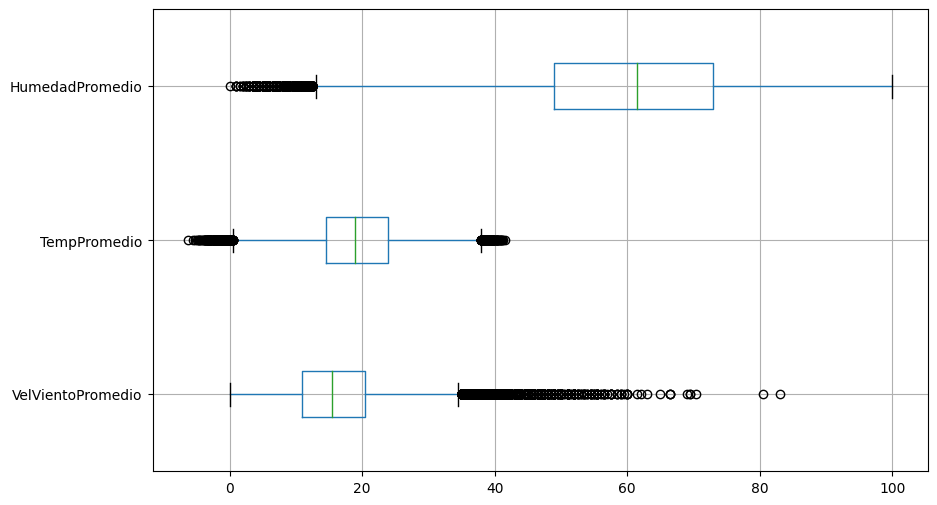

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column=["VelVientoPromedio","TempPromedio","HumedadPromedio"], vert=False)
plt.show()

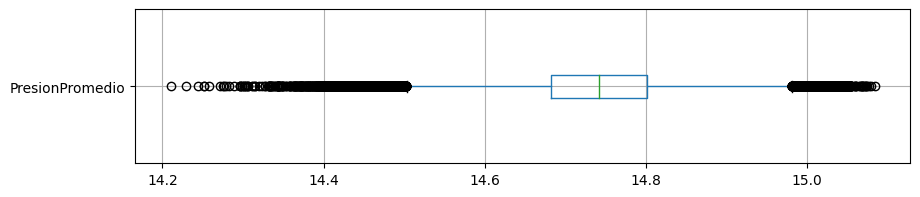

In [ ]:
plt.figure(figsize=(10,2))
df.boxplot(column=["PresionPromedio"], vert=False)
plt.show()

In [ ]:
df["HumedadPromedio"] = df["HumedadPromedio"].clip(lower=15, upper=100)
df["TempPromedio"] = df["TempPromedio"].clip(lower=1, upper=37)
df["VelVientoPromedio"] = df["VelVientoPromedio"].clip(lower=0, upper=34)
df["PresionPromedio"] = df["PresionPromedio"].clip(lower=14.57, upper=14.97)

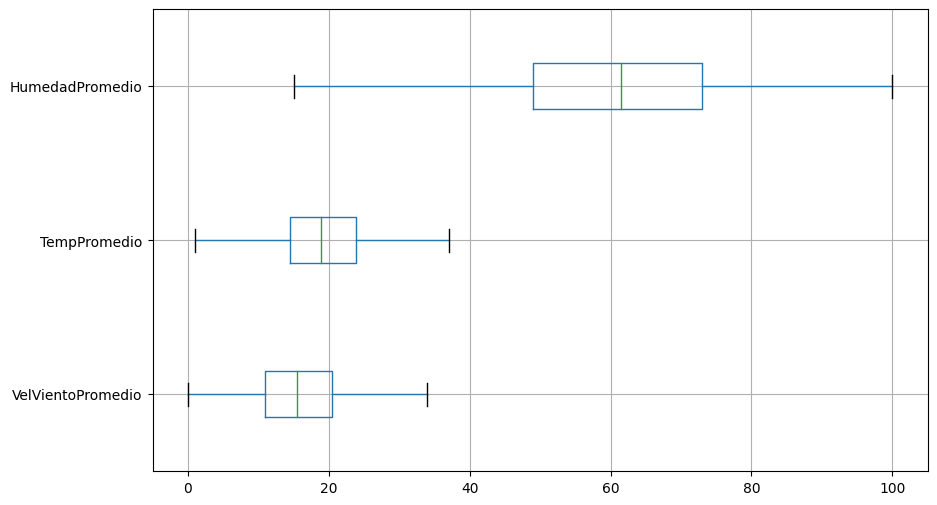

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column=["VelVientoPromedio","TempPromedio","HumedadPromedio"], vert=False)
plt.show()

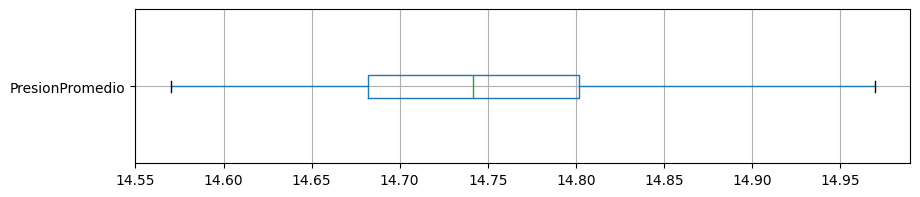

In [ ]:
plt.figure(figsize=(10,2))
df.boxplot(column=["PresionPromedio"], vert=False)
plt.show()

En el siguiente grafico podemos ver que los datos se concentran entre los años 2009 a 2016 de forma casi pareja, siendo las excepciones el 2007, 2008 y 2017

Text(0.5, 1.0, 'Cantidad de registros segun año')

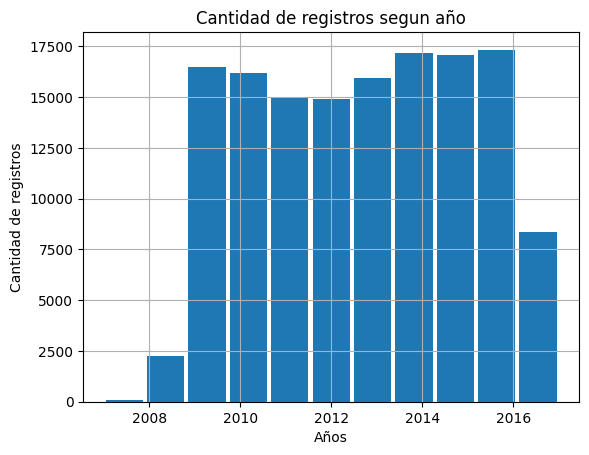

In [ ]:
df["Anio"].hist(grid=True, bins=11, orientation="vertical", rwidth=0.9)
plt.xlabel('Años')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros segun año')

Como podemos apreciar en el siguiente grafico resulta facil intuir que mientras mayor sea la temperatura minima tambien sera mayor la temperatura maxima ya que esos datos corresponden a areas o ciudades que son mas calurosas que las de los valores mas bajos. Esto significa que ambas variables tienen una correlacion positiva

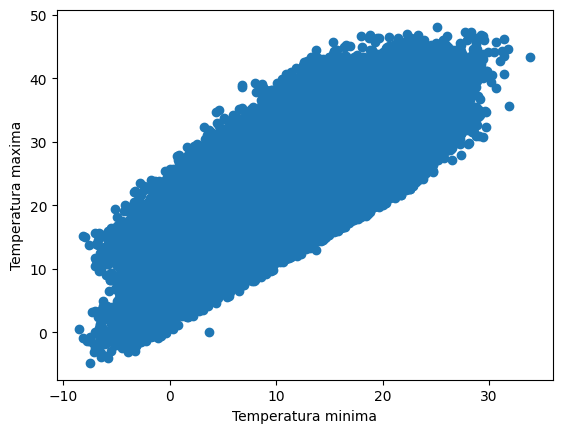

In [ ]:
plt.scatter(df["MinTemp"], df["MaxTemp"])
plt.xlabel("Temperatura minima")
plt.ylabel(("Temperatura maxima"))
plt.show()

En el siguiente grafico podemos observar que comparando todos los meses del año, la temperatura promedio, aunque varia notablemente, no parece afectar a si llueve al dia siguiente o no ya que cada uno de los graficos de violin parecen mas o menos parejos en ambos lados

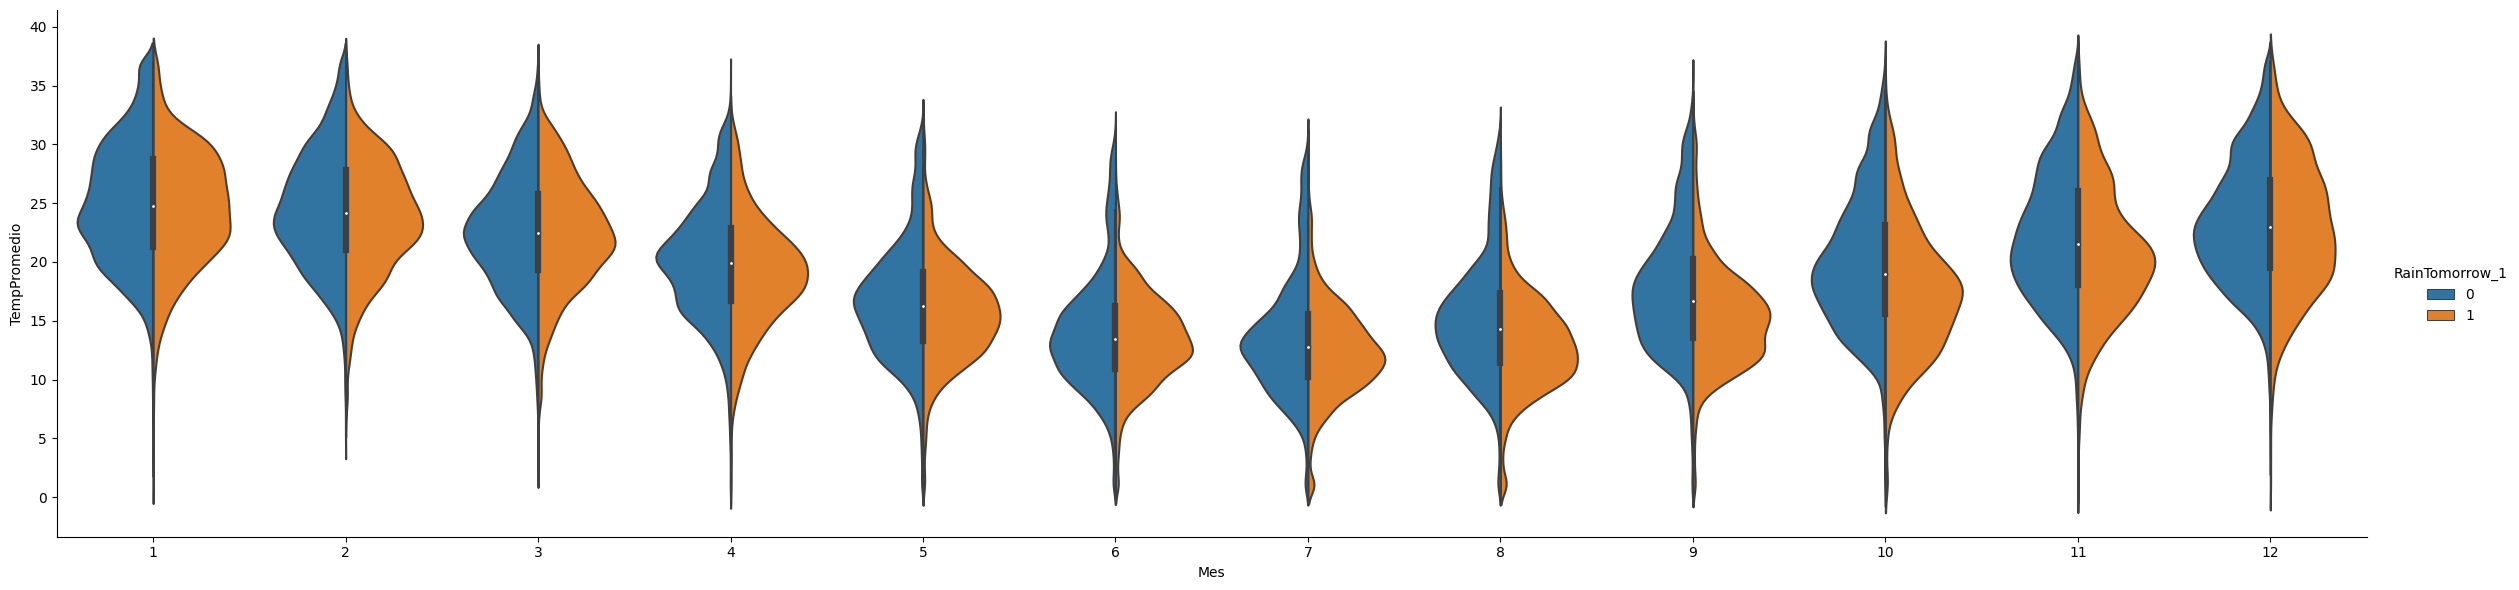

In [ ]:
datosjson = df[["Mes","TempPromedio","RainTomorrow_1"]]
sns.catplot(data=datosjson, kind="violin", x="Mes", y="TempPromedio", hue="RainTomorrow_1", split=True,height=6, aspect=4)

En este grafico de distribucion bivariada podemos observar que los puntos centrales del grafico donde se encuentran la velocidad del viento con la temperatura promedio son mas densos y tienen mas ocurrencias de lluvia al dia siguiente que los puntos que estan mas fuera del grafico, donde estan mas presentes los casos donde no llovio al dia siguiente

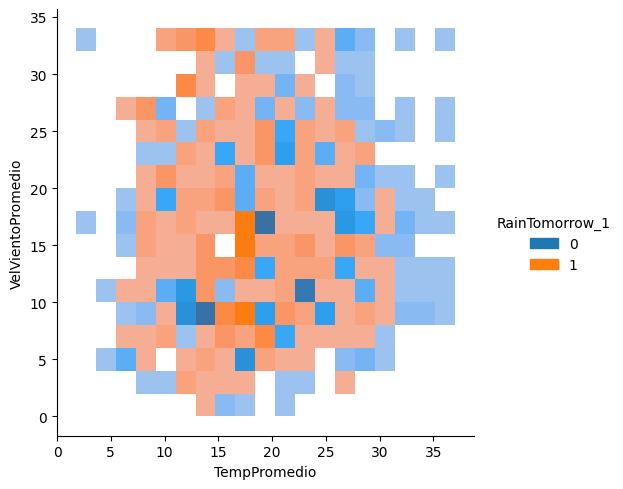

In [ ]:
datosjson = df[["TempPromedio","RainTomorrow_1","VelVientoPromedio","HumedadPromedio","PresionPromedio"]].sample(1000)
sns.displot(datosjson, x="TempPromedio", y="VelVientoPromedio", hue="RainTomorrow_1")

Podemos ver que la humedad en cada año suele ser mas o menos igual en cuanto a rango a la del resto de años

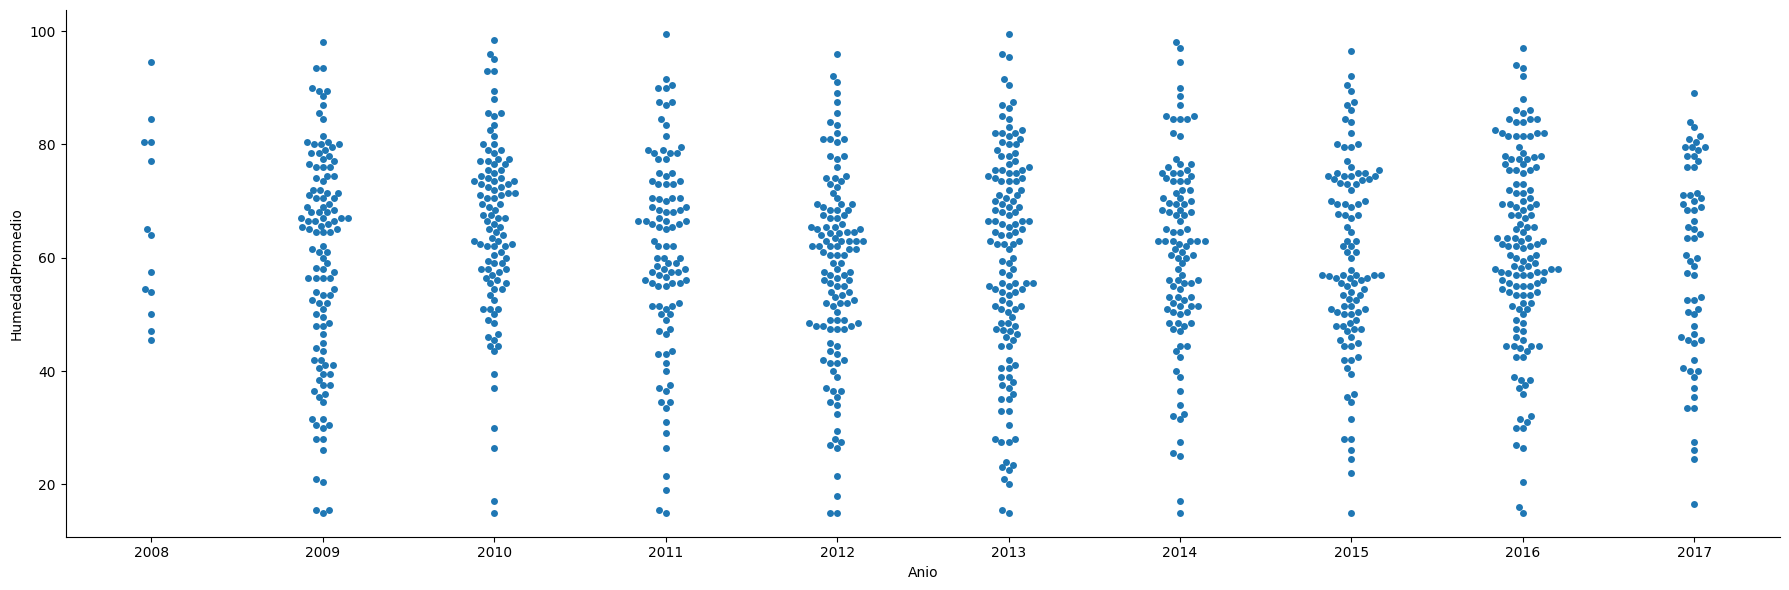

In [ ]:
datosjson = df[["Anio","RainTomorrow_1","VelVientoPromedio","HumedadPromedio","PresionPromedio"]].sample(1000)
sns.catplot(data=datosjson, x="Anio", y="HumedadPromedio", kind="swarm", height=6, aspect=3)

In [ ]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,VelVientoPromedio,TempPromedio,HumedadPromedio,PresionPromedio,Fecha,Anio,Mes,RainToday_0,RainToday_1,RainTomorrow_0,RainTomorrow_1
65905,2008-12-08,Melbourne,11.4,22.4,0.0,S,37.000000,S,S,13.0,24.0,61.0,41.0,14.727254,14.670689,6.0,3.0,13.5,20.3,0.0,18.5,16.90,51.0,14.698972,2008-12-08,2008,12,1,0,1,0
71407,2013-10-07,Nhil,3.5,20.0,0.2,WSW,41.000000,ESE,WSW,9.0,22.0,87.0,54.0,14.730155,14.714201,6.0,5.0,9.7,17.7,0.0,15.5,13.70,70.5,14.722178,2013-10-07,2013,10,1,0,1,0
50463,2016-08-23,Tuggeranong,4.1,13.9,4.2,SSE,31.000000,SSE,ENE,13.0,7.0,72.0,48.0,14.714201,14.705498,6.0,5.0,8.9,13.2,0.2,10.0,11.05,60.0,14.709850,2016-08-23,2016,8,0,1,1,0
9760,2011-05-15,CoffsHarbour,9.2,19.9,0.0,SW,39.000000,SW,S,20.0,22.0,43.0,47.0,14.896950,14.885347,1.0,1.0,15.5,19.1,0.0,21.0,17.30,45.0,14.891148,2011-05-15,2011,5,1,0,1,0
37418,2013-07-27,WaggaWagga,0.6,14.2,0.0,ENE,26.000000,ENE,E,9.0,9.0,87.0,53.0,14.939011,14.901301,2.0,1.0,4.1,13.8,0.0,9.0,8.95,70.0,14.920156,2013-07-27,2013,7,1,0,1,0
30985,2012-04-01,Sydney,16.2,25.4,0.0,WSW,39.000000,WNW,E,9.0,17.0,67.0,59.0,14.769316,14.721453,5.0,4.0,21.0,23.7,0.6,13.0,22.35,63.0,14.745384,2012-04-01,2012,4,1,0,1,0
83879,2014-10-09,Brisbane,19.4,25.3,0.0,E,33.000000,SE,E,11.0,13.0,56.0,49.0,14.799774,14.767865,6.0,4.0,23.5,24.0,0.0,12.0,23.75,52.5,14.783819,2014-10-09,2014,10,1,0,1,0
47963,2009-06-13,Tuggeranong,0.1,11.7,0.0,N,28.000000,NNE,N,6.0,15.0,94.0,53.0,14.776568,14.708399,6.0,5.0,1.4,9.9,0.2,10.5,5.65,73.5,14.742483,2009-06-13,2009,6,1,0,1,0
127763,2011-07-26,Hobart,1.9,12.9,0.0,NNW,43.000000,NNW,SSW,17.0,13.0,81.0,47.0,14.795423,14.798323,6.0,6.0,4.9,12.0,0.0,15.0,8.45,64.0,14.796873,2011-07-26,2011,7,1,0,1,0
29516,2008-02-20,Sydney,18.3,26.4,0.0,W,41.749238,W,E,13.0,22.0,80.0,60.0,14.698246,14.660536,3.0,1.0,21.3,25.2,0.0,17.5,23.25,70.0,14.679391,2008-02-20,2008,2,1,0,1,0


## Modelos estadisticos
Finalmente realizaremos la aplicacion de modelos estadisticos que buscarán predecir los posibles valores futuros del atributo target RISK_MM

In [ ]:
RISK_MM, Rainfall = dmatrices('RISK_MM ~ Rainfall', data = df, return_type = 'dataframe')
RISK_MM[:10]

,RISK_MM
0,0.0
1,0.0
2,0.0
3,1.0
4,0.2
5,0.0
6,0.0
7,0.0
8,1.4
9,0.0


In [ ]:
modelo = sm.OLS(RISK_MM, Rainfall)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                 1.481e+04
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:33:01   Log-Likelihood:            -4.9126e+05
No. Observations:              140787   AIC:                         9.825e+05
Df Residuals:                  140785   BIC:                         9.825e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5993      0.022     72.930      0.0

eval_env: 1


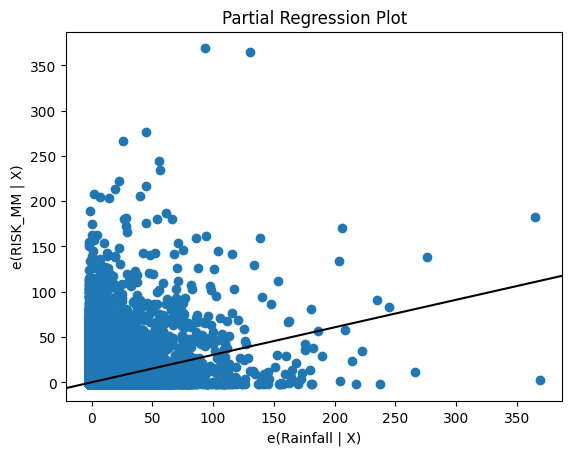

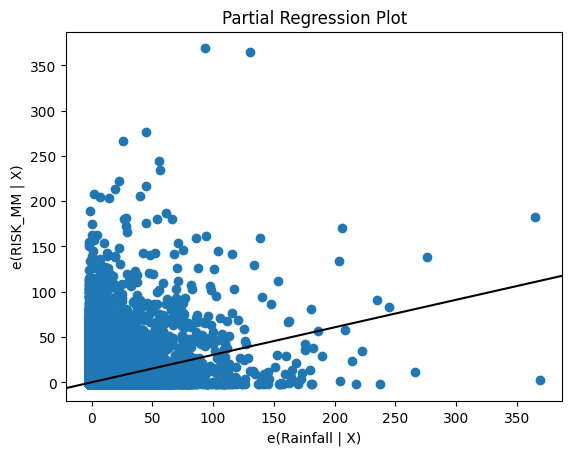

In [ ]:
sm.graphics.plot_partregress('RISK_MM','Rainfall',[], data = df, obs_labels=False)

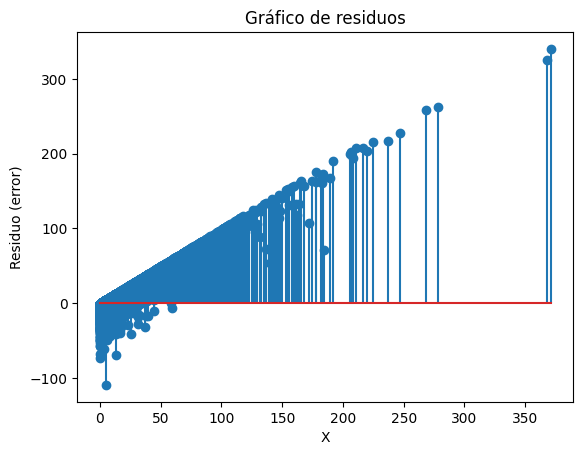

In [ ]:
plt.stem(df['RISK_MM'], resultado.resid, use_line_collection=True);
plt.title("Gráfico de residuos")
plt.xlabel("X")
plt.ylabel("Residuo (error)")
plt.show()